# Working with MISO2 data

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from model.output.MISO2_database import MISO2Database

In [2]:
database = MISO2Database()
database.restore_from_parquet(os.path.join(os.getcwd(), os.pardir, os.pardir, "output", "usuk"), "miso_db.json")

MISO2Databases are just a wrapper object around the Pandas DataFrames the MISO2 model outputs. You can query the categories with `get_categories()` to see what dimensions are available and then retrieve the data you need with `get_subset()`.

In [8]:
database.get_categories("enduse")

{'type': ['result'],
 'region': ['United Kingdom', 'United States of America'],
 'name': ['F_10_11_supply_EoL_waste_enduse',
  'F_9_10_GAS_enduse',
  'S10_stock_enduse'],
 'material': ['aggr_4asph',
  'aggr_4concr',
  'aggr_downcycl',
  'aggr_virgin',
  'aluminum',
  'asphalt',
  'bitumen',
  'bricks',
  'cement',
  'chromium',
  'concrete',
  'copper',
  'glass_cont',
  'glass_flat',
  'iron_steel',
  'lead',
  'manganese',
  'metals_other',
  'nickel',
  'paper',
  'plastic',
  'tin',
  'wood',
  'zinc'],
 'sector': ['Civil_engineering_except_roads',
  'Computers_and_precision_instruments',
  'Electrical_equipment',
  'Food_packaging',
  'Furniture_and_other_manufactured_goods_nec',
  'Machinery_and_equipment',
  'Motor_vehicles_trailers_and_semi-trailers',
  'Non_residential_buildings',
  'Other_transport_equipment',
  'Printed_matter_and_recorded_media',
  'Products_nec',
  'Residential_buildings',
  'Roads',
  'Textiles'],
 'time': [1820, 2016]}

In [52]:
sectors = ["Civil_engineering_except_roads", "Residential_buildings", "Roads", "Non_residential_buildings"]
us_stocks_main_enduses = database.get_subset(output_type="enduse", parameter="S10_stock_enduse", sector=sectors, drop_levels=True).groupby("sector").sum()

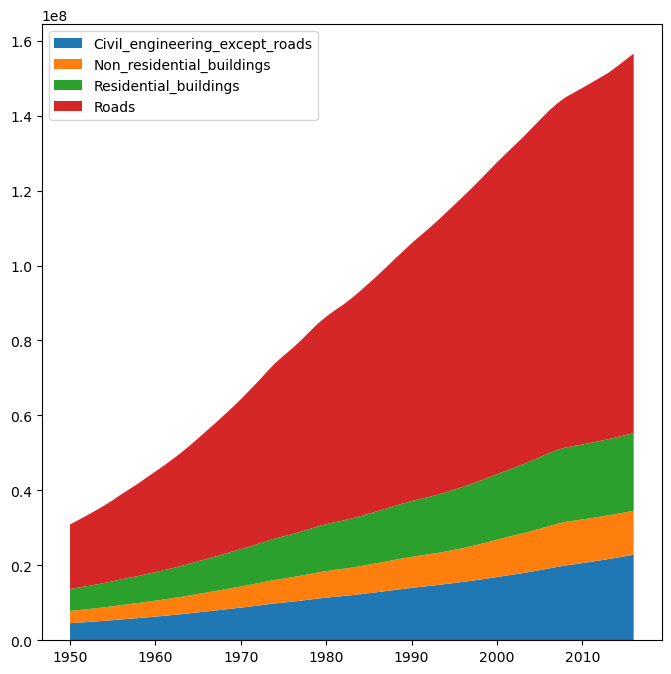

In [74]:
plt.figure(figsize=(8,8))
start_date = 1950
plt.stackplot(np.arange(start_date, 2017), us_stocks_main_enduses.iloc[:,start_date-1820:], labels=us_stocks_main_enduses.index)
plt.legend(loc='upper left')
plt.show()

<Axes: xlabel='time'>

<Figure size 800x800 with 0 Axes>

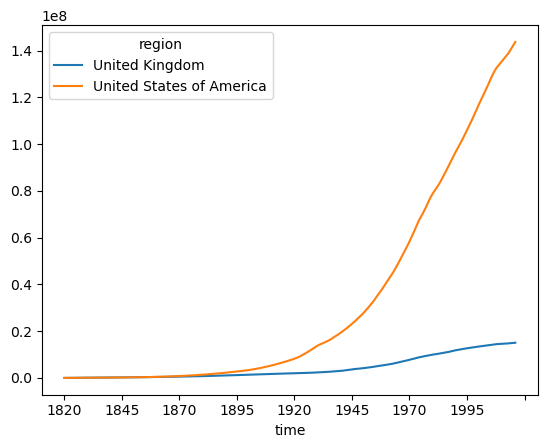

In [76]:
plt.figure(figsize=(8,8))
all_stocks = database.get_subset(output_type="enduse", parameter="S10_stock_enduse", drop_levels = True).groupby("region").sum()
all_stocks.T.plot(kind="line")